# Unsupervised Learning

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Importing dataset

In [2]:
# import the dataset
flower = sns.load_dataset('iris')

print(flower.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Remove the Target Feature, we will deal with Descriptive features only.

In [3]:
descriptive_features = flower.iloc[:,:-1]
descriptive_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
descriptive_features = flower.iloc[:,:-1].values
descriptive_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Finding the optimum number of clusters for K-means classification

The k-means algorithm aims to choose centroids that minimize the inertia or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration

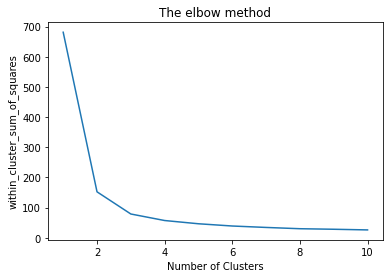

In [5]:
# elbow method
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

# plotting the results onto a line graph, allowing us to observe 'The Elbow'
plt.plot(range(1,11),within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of Clusters') 
plt.ylabel('within_cluster_sum_of_squares') # within clusters sum of square
plt.show()


# Apply K-means Clustering

In [6]:
# Apply k-means to dataset/create k-means classifier


In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_prediction = kmeans.fit_predict(descriptive_features)

In [8]:
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualizing the Cluters 

### Ploting on the basis of Sepal Features

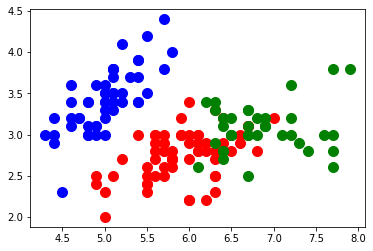

In [9]:
#Visualizing the Clusters
plt.scatter(descriptive_features[y_prediction == 0, 0],
            descriptive_features[y_prediction == 0, 1], s=100, c='red', label='Iris-Setosa')
plt.scatter(descriptive_features[y_prediction == 1,0],
            descriptive_features[y_prediction == 1, 1], s=100, c='blue', label='Iris-Versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 0],
            descriptive_features[y_prediction == 2, 1], s=100, c='green', label='Iris-Virginica')




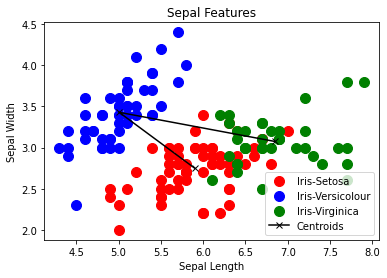

In [10]:
#Visualizing the Clusters
plt.scatter(descriptive_features[y_prediction == 0, 0],
            descriptive_features[y_prediction == 0, 1], s=100, c='red', label='Iris-Setosa')
plt.scatter(descriptive_features[y_prediction == 1, 0],
            descriptive_features[y_prediction == 1, 1], s=100, c='blue', label='Iris-Versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 0],
            descriptive_features[y_prediction == 2, 1], s=100, c='green', label='Iris-Virginica')



# plotting the centroids of clusters
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black', label='Centroids')
plt.title('Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')  # within clusters sum of square
plt.legend()


#### plotting on the basis of Petal features

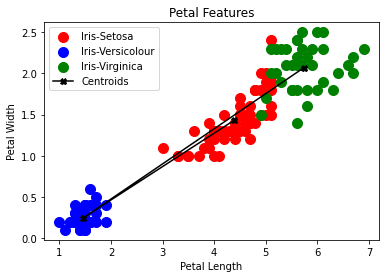

In [11]:
#Visualizing the Clusters
plt.scatter(descriptive_features[y_prediction == 0, 2],
            descriptive_features[y_prediction == 0, 3], s=100, c='red', label='Iris-Setosa')
plt.scatter(descriptive_features[y_prediction == 1, 2],
            descriptive_features[y_prediction == 1, 3], s=100, c='blue', label='Iris-Versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 2],
            descriptive_features[y_prediction == 2, 3], s=100, c='green', label='Iris-Virginica')


# plotting the centroids of clusters
plt.plot(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='X', c='black', label='Centroids')
plt.title('Petal Features')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')  # within clusters sum of square
plt.legend()


# Match Accuracy with known labels i.e Species in Iris Dataset" 

In [12]:
target_features = flower.iloc[:,-1:]
target_features


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


# Changing Categorical data into Numeric Data

In [13]:
target_feature = target_feature.replace('setosa',1)
target_feature = target_feature.replace('versicolor', 0)
target_feature = target_feature.replace('virginica', 2)

target_feature

NameError: name 'target_feature' is not defined

# Measuring Accuracy

In [ ]:
# Measuring Score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print("Accuracy Score of K-mean Classification is: ", score)

Accuracy Score of K-mean Classification is:  0.8933333333333333


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

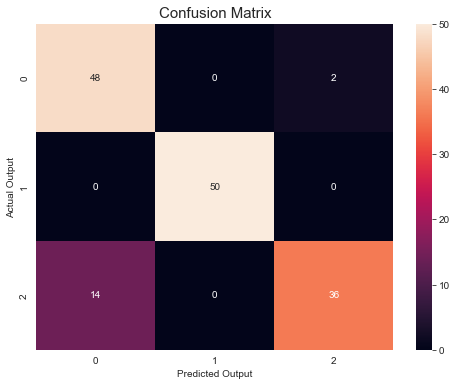

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.ylabel('Actual Output')
plt.xlabel('Predicted Output')
plt.title("Confusion Matrix",size=15)

# K mediods

In [ ]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.3
    Uninstalling pip-21.2.3:
      Successfully uninstalled pip-21.2.3
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install \Users\Anonymous\Downloads\scikit_learn-1.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: scikit_learn-1.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl is not a supported wheel on this platform.


In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn-extra


  Using cached scikit-learn-extra-0.2.0.tar.gz (813 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'



  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn-extra (pyproject.toml) did not run successfully.

Failed to build scikit-learn-extra



  │ exit code: 1
  ╰─> [8 lines of output]
      C:\Users\Anonymous\AppData\Local\Temp\pip-build-env-s65i70sj\overlay\Lib\site-packages\setuptools\dist.py:731: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      running build_ext
      building 'sklearn_extra.utils._cyfht' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn-extra
ERROR: Could not build wheels for scikit-learn-extra, which is required to install pyproject.toml-based projects


In [ ]:
# Apply k-means to dataset/create k-means classifier
from sklearn_extra.cluster import kMedoids
kmedions = kMedoids(n_clusters=3, metric='euclidean',method='alternate',init='heuristic',
                max_iter=600, n_init=10, random_state=0)
y_prediction = k_medions.fit_predict(descriptive_features)


ModuleNotFoundError: No module named 'sklearn_extra'